m = 9.9000 ± 0.0385 mT/A
b = -0.6089 ± 0.0366 mT


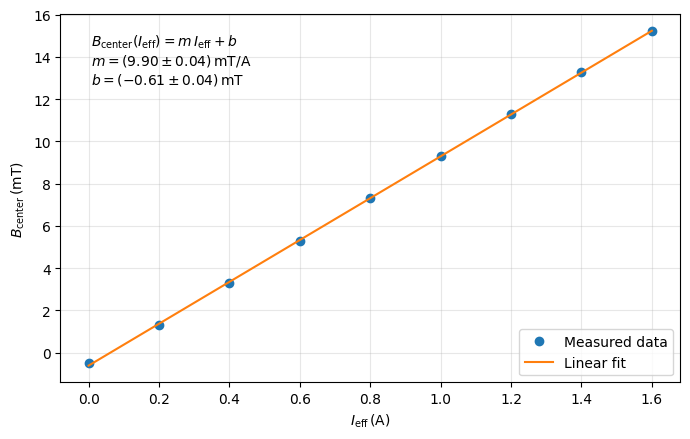

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# --- Data (Task 3): center field at z = 3.5 cm ---
I_eff = np.array([0.00, 0.20, 0.40, 0.60, 0.80, 1.00, 1.20, 1.40, 1.60])  # [A]
B_center = np.array([-0.5,  1.3,  3.3,  5.3,  7.3,  9.3, 11.3, 13.3, 15.2])  # [mT]

# --- Linear regression: B = m*I + b ---
(coefs, cov) = np.polyfit(I_eff, B_center, deg=1, cov=True)
m, b = coefs
sigma_m = np.sqrt(cov[0, 0])
sigma_b = np.sqrt(cov[1, 1])

print(f"m = {m:.4f} ± {sigma_m:.4f} mT/A")
print(f"b = {b:.4f} ± {sigma_b:.4f} mT")

# --- Plot ---
I_plot = np.linspace(I_eff.min(), I_eff.max(), 200)
B_fit = m * I_plot + b

plt.figure(figsize=(7, 4.5))
plt.plot(I_eff, B_center, "o", label="Measured data")
plt.plot(I_plot, B_fit, "-", label="Linear fit")

# Put fit results into the plot
fit_text = (
    r"$B_{\mathrm{center}}(I_{\mathrm{eff}})=m\,I_{\mathrm{eff}}+b$" "\n"
    rf"$m=({m:.2f}\pm{sigma_m:.2f})\,\mathrm{{mT/A}}$" "\n"
    rf"$b=({b:.2f}\pm{sigma_b:.2f})\,\mathrm{{mT}}$"
)
plt.text(
    0.05, 0.95, fit_text,
    transform=plt.gca().transAxes,
    va="top"
)

plt.xlabel(r"$I_{\mathrm{eff}}\,(\mathrm{A})$")
plt.ylabel(r"$B_{\mathrm{center}}\,(\mathrm{mT})$")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

# --- Save figure ---
outpath = "../resources/figures/Bcenter_calibration_fit.png"
plt.savefig(outpath, dpi=300)
plt.show()
